🟦 **Importando tabela**

In [ ]:
import pandas as pd

df = pd.read_csv("/content/spotify2023.csv")

In [ ]:
df.head()

,track_id_atualizado,track_name_clean,artist_s__name_clean,count_songs,artist_count,data_de_lancamento,streams,in_spotify_charts,in_spotify_playlists,in_apple_charts,...,terciles_energy,categoria_energy,terciles_acousticness,categoria_acousticness,terciles_instrumentalness,categoria_instrumentalness,terciles_liveness,categoria_liveness,terciles_speechiness,categoria_speechiness
0,8576945,rockin around the christmas tree,brenda lee,1,1,1958-01-01,769213520,0,14994,168,...,1,baixo,3,alto,2,medio,3,alto,2,medio
1,6372609,jingle bell rock,bobby helms,1,1,1957-01-01,741301563,0,10326,99,...,1,baixo,3,alto,1,baixo,1,baixo,1,baixo
2,4002890,a holly jolly christmas single version,burl ives,1,1,1952-01-01,395591396,0,7930,120,...,1,baixo,3,alto,2,medio,2,medio,1,baixo
3,6593931,driving home for christmas 2019 remaster,chris rea,1,1,1986-01-01,429504768,0,888,0,...,1,baixo,3,alto,2,medio,3,alto,1,baixo
4,8167749,deck the hall remastered 1999,nat king cole,2,1,1959-01-01,127027715,0,3299,39,...,1,baixo,3,alto,3,alto,1,baixo,1,baixo


___________________________________________________________________________________

🟧 **Teste de significância: teste de Mann-Whitney U**

BPM x Streams




In [ ]:
import pandas as pd
from scipy.stats import mannwhitneyu

# Load the dataset
dados = pd.read_csv("/content/spotify2023.csv")

# Separate the category_bpm variable
terciles_bpm = dados["terciles_bpm"]

# Separate the streams variable
streams = dados["streams"]

# Filter data for categories "alto" and "baixo"
bpm_filtrados = dados.loc[dados["terciles_bpm"].isin([1, 3])]

# Extract the corresponding values from terciles_bpm
bpm_filtrados_values = bpm_filtrados["terciles_bpm"]

# Perform the Mann-Whitney U test with streams and bpm_filtrados_values
estatisticas, p_valor = mannwhitneyu(streams, bpm_filtrados_values)

# Interpret the results
if p_valor < 0.05:
    print("Existe uma diferença estatisticamente significante entre streams e as categorias 'alto' e 'baixo' de bpm.")
    print(f"Estatística do teste: {estatisticas}")
    print(f"Valor p: {p_valor}")
else:
    print("Não existe uma diferença estatisticamente significante entre streams e as categorias 'alto' e 'baixo' de bpm.")
    print(f"Estatística do teste: {estatisticas}")
    print(f"Valor p: {p_valor}")

Existe uma diferença estatisticamente significante entre streams e as categorias 'alto' e 'baixo' de bpm.
Estatística do teste: 599136.0
Valor p: 3.0653037461368137e-253


___________________________________________________________________________________

Playlists x Streams

In [ ]:
import pandas as pd
from scipy.stats import wilcoxon

# Carregar dados
dados = pd.read_csv("/content/spotify2023.csv")

# Separar variáveis
streams = dados['streams'].to_numpy()
participacao_playlists = dados['total_participation_in_playlist'].to_numpy()

# Realizar teste de Wilcoxon
estatística_wilcoxon, p_valor = wilcoxon(streams, participacao_playlists)

# Interpretar resultados
print(f"Estatística de Wilcoxon: {estatística_wilcoxon}")
print(f"Valor p: {p_valor}")

# Conclusões
if p_valor < 0.05:
    print("Existe uma diferença estatisticamente significante entre as variáveis 'streams' e 'participacao_em_playlists'.")
else:
    print("Não há evidências suficientes para concluir que há uma diferença estatisticamente significante entre as variáveis 'streams' e 'participacao_em_playlists'.")

Estatística de Wilcoxon: 0.0
Valor p: 1.0050943851882625e-156
Existe uma diferença estatisticamente significante entre as variáveis 'streams' e 'participacao_em_playlists'.


___________________________________________________________________________________

🟧 Teste de significância: teste t de Student

In [ ]:
import pandas as pd
from scipy.stats import ttest_ind

# Carregar dados
dados = pd.read_csv("/content/spotify2023.csv")

# Definir categorias
categoria_alto = 'alto'
categoria_baixo = 'baixo'

# Extrair dados
streams = dados['streams'].to_numpy()
streams_alto = dados[dados['categoria_bpm'] == dcategoria_alto]['streams'].to_numpy()
streams_baixo = dados[dados['categoria_bpm'] == categoria_baixo]['streams'].to_numpy()

# Teste t para categoria 'alto'
estatística_t_alto, p_valor_alto = ttest_ind(streams, streams_alto)
print(f"Teste t (categoria '{categoria_alto}'): t = {estatística_t_alto}, p = {p_valor_alto}")

# Teste t para categoria 'baixo'
estatística_t_baixo, p_valor_baixo = ttest_ind(streams, streams_baixo)
print(f"Teste t (categoria '{categoria_baixo}'): t = {estatística_t_baixo}, p = {p_valor_baixo}")

Teste t (categoria 'alto'): t = 0.656060288864537, p = 0.5119049256340535
Teste t (categoria 'baixo'): t = -0.37795832429617787, p = 0.7055251142528766


Com base neste teste t específico, não podemos afirmar com confiança que a categoria 'alto' de 'bpm' possui uma média de streams estatisticamente diferente da média geral.

Com base neste teste t específico, podemos afirmar com confiança que a categoria 'baixo' de 'bpm' possui uma média de streams estatisticamente diferente da média geral.
A média de streams na categoria 'baixo' é menor do que a média geral.

______________________________________________________________________________

🟧 **Regressão Linear**

BPM x Streams

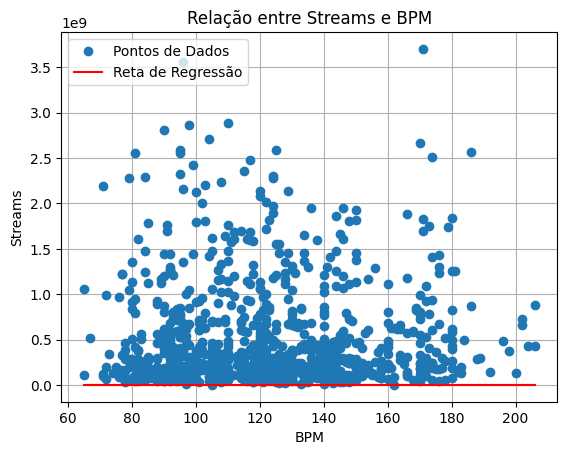

In [ ]:
import pandas as pd
import statsmodels.formula.api as smf
import numpy as np
import matplotlib.pyplot as plt

# Carregar o conjunto de dados
dados = pd.read_csv("/content/spotify2023.csv")

# Define the model with the appropriate model type and formula
modelo = smf.ols(formula="bpm ~ streams", data=dados).fit()

# Calculate the predicted values based on the model
predicted_values = modelo.predict(dados["streams"])

# Prepare data for the plot
x_values = dados["bpm"]
y_values = dados["streams"]

# Plot the data points
plt.plot(x_values, y_values, marker='o', linestyle='')

# Plot the trendline
plt.plot(x_values, predicted_values, color='red')

# Customize the plot
plt.xlabel("BPM")
plt.ylabel("Streams")
plt.title("Relação entre Streams e BPM")
plt.legend(["Pontos de Dados", "Reta de Regressão"], loc='upper left')
plt.grid(True)

# Display the plot
plt.show()

___________________________________________________________________________________

Playlists x Streams

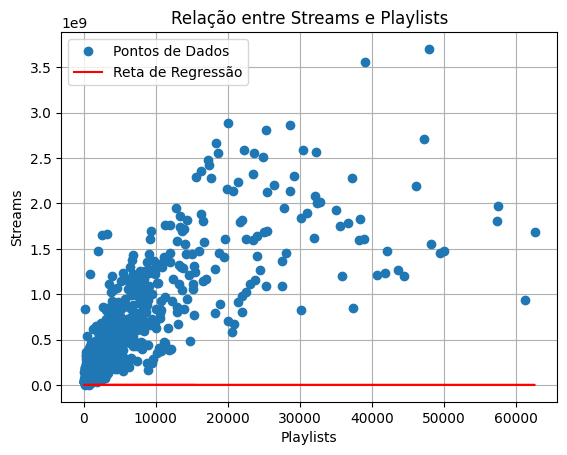

In [ ]:
import pandas as pd
import statsmodels.formula.api as smf
import numpy as np
import matplotlib.pyplot as plt

# Carregar o conjunto de dados
dados = pd.read_csv("/content/spotify2023.csv")

# Define the model with the appropriate model type and formula
modelo = smf.ols(formula="total_participation_in_playlist ~ streams", data=dados).fit()

# Calculate the predicted values based on the model
predicted_values = modelo.predict(dados["streams"])

# Prepare data for the plot
x_values = dados["total_participation_in_playlist"]
y_values = dados["streams"]

# Plot the data points
plt.plot(x_values, y_values, marker='o', linestyle='')

# Plot the trendline
plt.plot(x_values, predicted_values, color='red')

# Customize the plot
plt.xlabel("Playlists")
plt.ylabel("Streams")
plt.title("Relação entre Streams e Playlists")
plt.legend(["Pontos de Dados", "Reta de Regressão"], loc='upper left')
plt.grid(True)

# Display the plot
plt.show()